In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [3]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
X = df.drop('label',axis=1)
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(42000, 784)

In [10]:
y_train.shape

(42000,)

In [11]:
X_test.shape

(18000, 784)

In [12]:
y_test.shape

(18000,)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
df['label'].nunique()

10

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
prediction = rf.predict(X_test)

In [18]:
rf.score(X_train,y_train)

1.0

In [19]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(y_test,prediction)

0.8786666666666667

In [21]:
confusion_matrix(y_test,prediction)

array([[1545,    1,   20,   48,    3,    2,  149,    0,   15,    0],
       [   3, 1717,    7,   56,    0,    0,   12,    0,    0,    0],
       [  12,    1, 1498,   22,  182,    0,   86,    0,   13,    0],
       [  34,    6,   10, 1671,   58,    0,   40,    0,    3,    0],
       [   4,    3,  136,   94, 1484,    0,   78,    0,    6,    0],
       [   0,    0,    0,    0,    0, 1671,    1,   44,    7,   15],
       [ 296,    3,  230,   40,  189,    1, 1062,    0,   25,    0],
       [   0,    0,    0,    0,    0,   42,    0, 1734,    3,   62],
       [   3,    0,    6,    5,    7,    4,   11,    1, 1725,    0],
       [   0,    0,    0,    0,    0,   19,    0,   63,    3, 1709]])

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1783
           1       0.99      0.96      0.97      1795
           2       0.79      0.83      0.81      1814
           3       0.86      0.92      0.89      1822
           4       0.77      0.82      0.80      1805
           5       0.96      0.96      0.96      1738
           6       0.74      0.58      0.65      1846
           7       0.94      0.94      0.94      1841
           8       0.96      0.98      0.97      1762
           9       0.96      0.95      0.95      1794

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



## Decision Tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
tree_prediction = tree.predict(X_test)

In [26]:
tree.score(X_train,y_train)

1.0

In [27]:
accuracy_score(y_test,tree_prediction)

0.7881666666666667

In [28]:
confusion_matrix(y_test,tree_prediction)

array([[1278,   14,   46,  117,   21,    4,  276,    0,   25,    2],
       [   8, 1706,    8,   48,   13,    2,    8,    0,    2,    0],
       [  41,    7, 1246,   33,  236,    2,  225,    0,   20,    4],
       [  80,   54,   30, 1449,  108,    3,   72,    0,   22,    4],
       [  15,   11,  279,  103, 1180,    1,  201,    0,   14,    1],
       [   3,    1,    1,   12,    2, 1563,    5,   80,   27,   44],
       [ 293,   15,  232,   71,  246,    4,  944,    0,   38,    3],
       [   0,    0,    0,    0,    0,  106,    0, 1592,   16,  127],
       [  18,    5,   19,   13,   19,   19,   32,   10, 1623,    4],
       [   1,    1,    1,    3,    2,   64,    2,  104,   10, 1606]])

In [29]:
print(classification_report(y_test,tree_prediction))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1783
           1       0.94      0.95      0.95      1795
           2       0.67      0.69      0.68      1814
           3       0.78      0.80      0.79      1822
           4       0.65      0.65      0.65      1805
           5       0.88      0.90      0.89      1738
           6       0.53      0.51      0.52      1846
           7       0.89      0.86      0.88      1841
           8       0.90      0.92      0.91      1762
           9       0.89      0.90      0.89      1794

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



## KNN classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
knn_prediction = knn.predict(X_test)

In [33]:
knn.score(X_train,y_train)

0.894547619047619

In [34]:
accuracy_score(y_test,knn_prediction)

0.8546111111111111

In [35]:
confusion_matrix(y_test,knn_prediction)

array([[1552,    2,   34,   33,    8,    1,  141,    0,   12,    0],
       [  14, 1727,    7,   38,    0,    0,    9,    0,    0,    0],
       [  23,    2, 1490,   18,  158,    0,  122,    0,    1,    0],
       [  91,   12,   20, 1589,   60,    0,   48,    0,    2,    0],
       [  13,    2,  213,   70, 1366,    0,  138,    0,    3,    0],
       [   1,    0,    1,    0,    0, 1437,   10,  176,    4,  109],
       [ 345,    1,  264,   28,  148,    0, 1049,    0,   10,    1],
       [   0,    0,    0,    0,    0,    5,    1, 1761,    1,   73],
       [   8,    1,   21,    9,   11,    1,   27,    7, 1675,    2],
       [   0,    0,    0,    0,    0,    4,    1,   52,    0, 1737]])

In [36]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1783
           1       0.99      0.96      0.98      1795
           2       0.73      0.82      0.77      1814
           3       0.89      0.87      0.88      1822
           4       0.78      0.76      0.77      1805
           5       0.99      0.83      0.90      1738
           6       0.68      0.57      0.62      1846
           7       0.88      0.96      0.92      1841
           8       0.98      0.95      0.97      1762
           9       0.90      0.97      0.93      1794

    accuracy                           0.85     18000
   macro avg       0.86      0.86      0.85     18000
weighted avg       0.86      0.85      0.85     18000



## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
lr_prediction = lr.predict(X_test)

In [40]:
lr.score(X_train,y_train)

0.8626428571428572

In [41]:
accuracy_score(y_test,lr_prediction)

0.8496111111111111

In [42]:
confusion_matrix(y_test,lr_prediction)

array([[1466,   14,   31,   86,   14,    1,  149,    0,   21,    1],
       [   4, 1719,   11,   51,    5,    0,    4,    1,    0,    0],
       [  22,    5, 1395,   21,  218,    0,  136,    0,   16,    1],
       [  59,   34,   20, 1574,   93,    0,   40,    1,    1,    0],
       [   5,    3,  144,   76, 1415,    0,  153,    0,    9,    0],
       [   1,    1,    1,    0,    0, 1561,    0,  101,   14,   59],
       [ 283,   10,  217,   51,  206,    0, 1050,    0,   28,    1],
       [   0,    0,    0,    0,    0,   52,    0, 1739,    5,   45],
       [   5,    2,    6,    9,   12,   18,   31,    7, 1672,    0],
       [   1,    0,    0,    0,    0,   26,    0,   63,    2, 1702]])

In [43]:
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1783
           1       0.96      0.96      0.96      1795
           2       0.76      0.77      0.77      1814
           3       0.84      0.86      0.85      1822
           4       0.72      0.78      0.75      1805
           5       0.94      0.90      0.92      1738
           6       0.67      0.57      0.62      1846
           7       0.91      0.94      0.93      1841
           8       0.95      0.95      0.95      1762
           9       0.94      0.95      0.94      1794

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



## Neural network

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42000, 784), (42000,), (18000, 784), (18000,))

In [45]:
#initialize sequential model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [46]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [47]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [48]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
model = Sequential()

In [50]:
#784 is features
model.add(Dense(400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(200, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(100, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(25, activation='relu'))


model.add(tf.keras.layers.BatchNormalization())


model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, epochs=6,validation_data=(X_test,y_test),verbose=1,batch_size=16)

Epoch 1/6
2625/2625 [==============================] - 15s 5ms/step - loss: 0.8553 - accuracy: 0.7161 - val_loss: 0.4698 - val_accuracy: 0.8421
Epoch 2/6
2625/2625 [==============================] - 13s 5ms/step - loss: 0.5079 - accuracy: 0.8223 - val_loss: 0.4353 - val_accuracy: 0.8571
Epoch 3/6
2625/2625 [==============================] - 13s 5ms/step - loss: 0.4435 - accuracy: 0.8438 - val_loss: 0.4471 - val_accuracy: 0.8659
Epoch 4/6
2625/2625 [==============================] - 13s 5ms/step - loss: 0.4246 - accuracy: 0.8512 - val_loss: 0.4744 - val_accuracy: 0.8671
Epoch 5/6
2625/2625 [==============================] - 13s 5ms/step - loss: 0.3965 - accuracy: 0.8590 - val_loss: 0.4480 - val_accuracy: 0.8638
Epoch 6/6
2625/2625 [==============================] - 14s 5ms/step - loss: 0.3819 - accuracy: 0.8640 - val_loss: 0.4943 - val_accuracy: 0.8637


In [52]:
model.history.history

{'loss': [0.6674807071685791,
  0.49471062421798706,
  0.44551730155944824,
  0.4217934012413025,
  0.40010032057762146,
  0.3846260607242584],
 'accuracy': [0.7738809585571289,
  0.8261428475379944,
  0.8423571586608887,
  0.8516190648078918,
  0.8567143082618713,
  0.8617143034934998],
 'val_loss': [0.4697665870189667,
  0.4353202283382416,
  0.44712328910827637,
  0.4743780791759491,
  0.447995662689209,
  0.4942968785762787],
 'val_accuracy': [0.8420555591583252,
  0.8571110963821411,
  0.8658888936042786,
  0.8670555353164673,
  0.8638333082199097,
  0.8636666536331177]}

In [53]:
df = pd.DataFrame(model.history.history)

<AxesSubplot:>

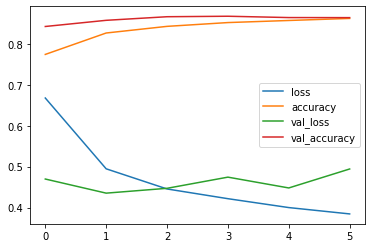

In [54]:
df.plot()

In [55]:
result = model.evaluate(X_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.4943 - accuracy: 0.8637


In [56]:
test = test.drop('label',axis=1)

In [57]:
predict=model.predict(test.astype('float32'))